<h1 style="text-align:center;font-size:30px;color:white;padding:25px;background:linear-gradient(to right,transparent -10%,#0652DD,transparent 110%);text-shadow:0px 0px 10px black;">Examples</h1>

<ul><li style="color:#218c74;font-size:20px">Import libraries</li></ul>

In [427]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import io

<ul><li style="color:#218c74;font-size:20px">Read datasets</li></ul>

In [387]:
usersdata = pd.read_json("user_accounts_data.json")
market = pd.read_csv("data_nike_vs_addidas_unsupervised.csv")

<ul><li style="color:#218c74;font-size:20px">Answer the questions.</li></ul>

<p style="font-size:15px"><b>1.</b> What are the top 10 affordable products? (With lowest price and highest rating) </p>

In [388]:
market.sort_values(by=["Sale Price","Rating"], ascending=[True,False]).head(10)

,Product Name,Product ID,Listing Price,Sale Price,Discount,Brand,Rating,Reviews
2044,Men's adidas Swimming Beach Print Maxout Slippers,CL0233,899,449,50,Adidas CORE / NEO,3.1,36
2046,Men's adidas Swim Eezay Maxout II Slippers,CM0106,999,499,50,Adidas CORE / NEO,5.0,1
2420,Men's adidas Toe Side Slippers,CL0252,999,499,50,Adidas CORE / NEO,3.8,22
147,Women's adidas Swim Jung Slippers,CM0072,999,499,50,Adidas CORE / NEO,3.2,20
2493,Men's adidas Swim Eezay Maxout II Slippers,CM0105,999,499,50,Adidas CORE / NEO,2.7,87
2203,Men's adidas Swim Ozor II Slippers,CL0213,1199,599,50,Adidas CORE / NEO,4.5,39
398,Women's adidas Swim Jung Slippers,CM0073,999,599,40,Adidas CORE / NEO,4.4,93
397,Women's adidas Swim Jung Slippers,CM0074,999,599,40,Adidas CORE / NEO,4.2,22
394,Women's adidas Swim Puka Slippers,CM0083,999,599,40,Adidas CORE / NEO,4.0,58
403,Women's adidas Swim Puka Slippers,CM0082,999,599,40,Adidas CORE / NEO,3.6,29


<p style="font-size:15px"><b>2.</b> Set 70% discount for nike products, then calculate their new sale price. </p>

In [389]:
# market["Brand"].value_counts()
market.loc[market["Brand"] == "Nike","Discount"] = 70
market["Sale Price"] = market["Sale Price"].astype("float64")
market.loc[market["Brand"] == "Nike","Sale Price"] = (market.loc[market["Brand"] == "Nike","Listing Price"] * market.loc[market["Brand"] == "Nike","Discount"]) / 100
market[market["Brand"] == "Nike"]

,Product Name,Product ID,Listing Price,Sale Price,Discount,Brand,Rating,Reviews
2625,Nike Air Force 1 '07 Essential,CJ1646-600,0,0.0,70,Nike,0.0,0
2626,Nike Air Force 1 '07,CT4328-101,0,0.0,70,Nike,0.0,0
2627,Nike Air Force 1 Sage Low LX,CI3482-200,0,0.0,70,Nike,0.0,0
2628,Nike Air Max Dia SE,CD0479-200,0,0.0,70,Nike,0.0,0
2629,Nike Air Max Verona,CZ6156-101,0,0.0,70,Nike,0.0,0
...,...,...,...,...,...,...,...,...
3263,Air Jordan 8 Retro,CI1236-100,15995,11196.5,70,Nike,5.0,1
3264,Nike Phantom Venom Club IC,AO0578-717,4995,3496.5,70,Nike,0.0,0
3265,Nike Mercurial Superfly 7 Academy TF,AT7978-414,8495,5946.5,70,Nike,5.0,1
3266,Nike Air Max 98,AH6799-300,0,0.0,70,Nike,4.0,4


<p style="font-size:15px"><b>3.</b> Count the number of products for each brand. </p>

In [390]:
market["Brand"].value_counts()

Brand
Adidas CORE / NEO           1111
Adidas ORIGINALS             907
Nike                         643
Adidas SPORT PERFORMANCE     606
Adidas Adidas ORIGINALS        1
Name: count, dtype: int64

<p style="font-size:15px"><b>4.</b> Seperate women products by a new column named 'for_women'. </p>

In [391]:
market["Gender"] = "Man & Woman"
market.loc[market["Product Name"].str.contains("Women"),"Gender"] = "Women"
market.loc[market["Product Name"].str.contains("Men"),"Gender"] = "Men"
market.head()

,Product Name,Product ID,Listing Price,Sale Price,Discount,Brand,Rating,Reviews,Gender
0,Women's adidas Originals NMD_Racer Primeknit S...,AH2430,14999,7499.0,50,Adidas Adidas ORIGINALS,4.8,41,Women
1,Women's adidas Originals Sleek Shoes,G27341,7599,3799.0,50,Adidas ORIGINALS,3.3,24,Women
2,Women's adidas Swim Puka Slippers,CM0081,999,599.0,40,Adidas CORE / NEO,2.6,37,Women
3,Women's adidas Sport Inspired Questar Ride Shoes,B44832,6999,3499.0,50,Adidas CORE / NEO,4.1,35,Women
4,Women's adidas Originals Taekwondo Shoes,D98205,7999,3999.0,50,Adidas ORIGINALS,3.5,72,Women


<p style="font-size:15px"><b>5.</b> Classify the products by price (suppose that the products whose selling price is greater than 20000$ are expensive). </p>

In [392]:
market["Expensive"] = market["Sale Price"]>20000
market[market["Sale Price"]>20000].head()

,Product Name,Product ID,Listing Price,Sale Price,Discount,Brand,Rating,Reviews,Gender,Expensive
1326,Unisex Originals CRAIG GREEN KONTUUR II SHOES,FV7826,23999,23999.0,0,Adidas ORIGINALS,2.4,86,Man & Woman,True
1328,Unisex Originals CRAIG GREEN KONTUUR II SHOES,FV7825,23999,23999.0,0,Adidas ORIGINALS,0.0,7,Man & Woman,True
1334,Unisex Originals CRAIG GREEN KONTUUR I SHOES,FV4419,23999,23999.0,0,Adidas ORIGINALS,3.1,37,Man & Woman,True
1377,UNISEX adidas Originals Pharrell Williams Hu N...,EF2335,21999,21999.0,0,Adidas ORIGINALS,2.7,75,Man & Woman,True
1382,UNISEX adidas Originals Pharrell Williams Hu N...,EG7737,21999,21999.0,0,Adidas ORIGINALS,3.0,9,Man & Woman,True


<p style="font-size:15px"><b>6.</b> Find the users that use gmail account as their email address.</p>

In [393]:
email_pattern = r'\b[A-Za-z][A-Za-z0-9.]+@gmail.com\b'
usersdata[usersdata["Email Address"].str.fullmatch(email_pattern)]

,Firstname,Lastname,Job Title,State,Address,Email Address,Phone Number,Birth
83,Carter,Freeburn,Fabricator,South Dakota,"Bempton Walk, 9041",Carter.Freeburn9739@gmail.com,6-172-767-4051,8/5/1960
155,Monica,Isaac,Design Engineer,Virginia,"Capeners Rue, 7624",Monica.Isaac8131@gmail.com,8-543-512-1424,10/25/1986
233,Percy,Osman,CNC Operator,Colorado,"Birkin Road, 4827",Percy.Osman6430@gmail.com,8-755-375-5388,7/26/1996
362,Aeris,Chappell,Software Engineer,Florida,"Dyott Alley, 973",Aeris.Chappell3520@gmail.com,5-257-668-8887,7/13/1978
472,Liv,Casey,Auditor,Alabama,"Heritage Alley, 97",Liv.casey1086@gmail.com,7-604-383-4512,5/28/1986


<p style="font-size:15px"><b>7.</b> Find the users whose names started with "A". </p>

In [394]:
usersdata[usersdata["Firstname"].str.startswith("A")].head()

,Firstname,Lastname,Job Title,State,Address,Email Address,Phone Number,Birth
12,Andrea,Goodman,Staffing Consultant,Kansas,"Endsleigh Lane, 7255",Andrea_Goodman7655@bcfhs.property,5-481-186-7872,12/2/1995
46,Alessia,Morris,Baker,Wisconsin,"Baltic Crossroad, 8057",Alessia_Morris2076@karnv.store,6-103-621-0703,11/5/1984
82,Alessandra,Huggins,Pharmacist,South Carolina,"Viscount Vale, 7108",Alessandra_Huggins1250@bcfhs.net,4-238-212-6651,8/3/1998
85,Alan,West,Loan Officer,Wisconsin,"Hickory Lane Boulevard, 659",Alan_West9293@yafr7.property,3-381-825-5353,5/24/1989
107,Abdul,Thorne,Baker,Pennsylvania,"Rivervalley Road, 6199",Abdul_Thorne3500@ohqqh.video,6-614-503-5712,4/24/2000


<p style="font-size:15px"><b>8.</b> Draw a pie plot based on number of products in each brand and explode 'Adidas ORIGINALS' using matplotlib library.</p>

([<matplotlib.patches.Wedge at 0x7fc628416710>,
 [Text(0.5300402155608789, 0.9638762212484429, 'Adidas CORE / NEO'),
  Text(-1.1893028097365501, 0.15987128182618543, 'Adidas ORIGINALS'),
  Text(-0.23400958304769942, -1.074820689716123, 'Nike'),
  Text(0.9173976578266487, -0.6069444269570149, 'Adidas SPORT PERFORMANCE'),
  Text(1.0999994918391978, -0.0010573332050763725, 'Adidas Adidas ORIGINALS')],
 [Text(0.28911284485138844, 0.5257506661355142, '34.00%'),
  Text(-0.6937599723463208, 0.09325824773194148, '27.75%'),
  Text(-0.1276415907532906, -0.5862658307542488, '19.68%'),
  Text(0.5003987224508992, -0.3310605965220081, '18.54%'),
  Text(0.5999997228213806, -0.0005767272027689304, '0.03%')])

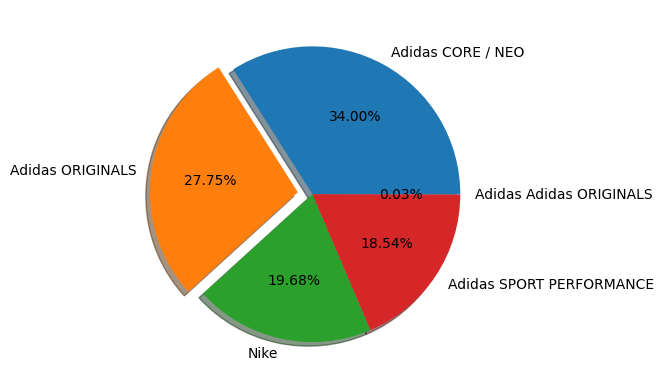

In [395]:
fig, ax = plt.subplots()
labels = list(market["Brand"].value_counts().index)
values = list(market["Brand"].value_counts())
ax.pie(values, labels=labels, shadow=True, startangle=0, explode=(0,0.1,0,0,0) ,autopct='%1.2f%%')

<p style="font-size:15px"><b>9.</b> Fix the birth column date-time format then say, how many days the oldest software engineer is bigger than the youngest one? </p>

In [430]:
usersdata["Birth"] = usersdata["Birth"].astype("datetime64[ns]")
youngest = usersdata["Birth"].max()
oldest = usersdata["Birth"].min()
(youngest - oldest).days

14951

<p style="font-size:15px"><b>10.</b> How many webmasters we have in usersdata? </p>

In [397]:
userdata[userdata["Job Title"] == "Webmaster"].count().iloc[0]
#dict = userdata.groupby("Job Title").count().iloc[:,0]
#dict

14